# ddG_binary_classification

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('../src/ddg_bin_train.csv')
df_test = pd.read_csv('../src/ddg_bin_test.csv')
df_train.head(5)

,SecSt,ASA_pct,delta_MW,delta_Chg,delta_ARM,delta_Hydro,delta_VdwV,delta_SASA,ddG_calc,ddGC
0,1,18.92,1,-1.0,0.0,-0.208,-5,-7,0.861,unstable
1,2,0.94,-16,0.0,0.0,0.257,-6,-13,0.806,unstable
2,2,8.61,22,1.5,0.5,0.137,27,45,-4.583,stable
3,3,8.67,-43,0.0,0.0,0.380,-29,-46,1.564,unstable
4,2,4.92,-10,-0.5,0.0,-0.263,-38,-33,5.951,unstable


In [3]:
def return_array(df:pd.DataFrame):
    X = df.iloc[:,0:len(df.columns)-1]
    y = pd.get_dummies(df['ddGC'])
    y = y['stable']
    return X,y

In [4]:
X_train, y_train = return_array(df_train)
X_test, y_test = return_array(df_test)

# Correlation

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

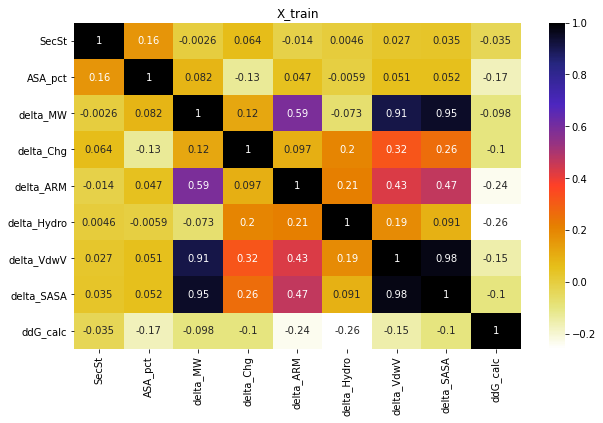

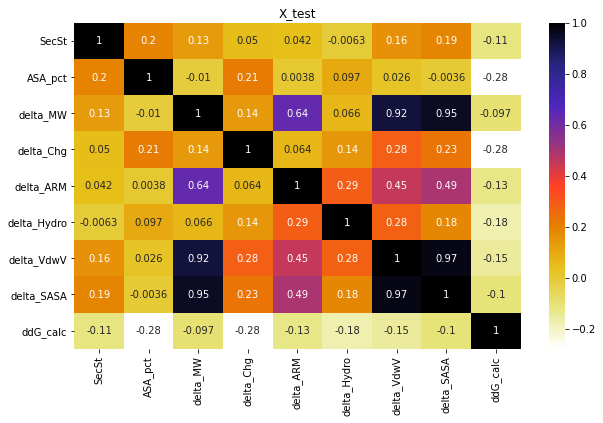

In [6]:
plt.figure(figsize=(10,6))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("X_train")
plt.show()

# delta_VdwV and delta_MW are correlated
# delta_SASA and delta_MW are correlated
# delta_SASA and delta_VdwV are correlated


plt.figure(figsize=(10,6))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("X_test")
plt.show()


# delta_VdwV and delta_MW are correlated
# delta_SASA and delta_MW are correlated
# delta_SASA and delta_VdwV are correlated

# Support Vector Machine

In [7]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
import numpy as np
model = []
cv_accuracy = []
test_accuracy = []

clf = SVC(C=10,gamma='scale',kernel='linear')

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.8736842105263157


In [8]:
from sklearn.metrics import classification_report, accuracy_score
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("SVC")

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        88
           1       0.50      0.29      0.36         7

    accuracy                           0.93        95
   macro avg       0.72      0.63      0.66        95
weighted avg       0.91      0.93      0.92        95

0.9263157894736842


# Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.8894736842105264


In [10]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("RF")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        88
           1       0.71      0.71      0.71         7

    accuracy                           0.96        95
   macro avg       0.85      0.85      0.85        95
weighted avg       0.96      0.96      0.96        95

0.9578947368421052


# Naive-Bayes Classifier

In [11]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.8447368421052632


In [12]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("NB")

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        88
           1       0.40      0.86      0.55         7

    accuracy                           0.89        95
   macro avg       0.69      0.88      0.74        95
weighted avg       0.94      0.89      0.91        95

0.8947368421052632


# KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.8315789473684212


In [14]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("KNN")

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        88
           1       0.17      0.14      0.15         7

    accuracy                           0.88        95
   macro avg       0.55      0.54      0.55        95
weighted avg       0.88      0.88      0.88        95

0.8842105263157894


#  Artificial Neural Network

In [15]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='relu',alpha=0.05,hidden_layer_sizes=(100,),learning_rate='constant',solver='sgd',max_iter=1000)
clf.fit(X_train, y_train.values.ravel())

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
print(np.mean(scores))
cv_accuracy.append(np.mean(scores))

0.8736842105263157


In [16]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
test_accuracy.append(accuracy_score(y_test,y_pred))
model.append("ANN")

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        88
           1       0.29      0.29      0.29         7

    accuracy                           0.89        95
   macro avg       0.61      0.61      0.61        95
weighted avg       0.89      0.89      0.89        95

0.8947368421052632


# Overall

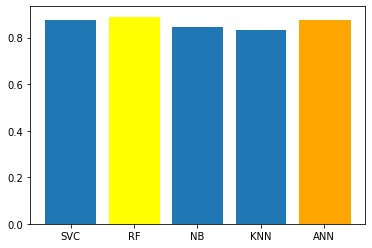

In [28]:
bar_list = plt.bar(model,cv_accuracy)
bar_list[1].set_color('yellow')
bar_list[4].set_color('orange')